# Minimum Temperature Trends at Sondrestrom, GL

The following is an analysis of the maximum temperature trends reported at a weather station on the Southwest coast of Greenland. I chose this site to study for two reasons. First, because the Greenland ice sheet is of critical importance to the Earth's systems. Increased warming here could result in the melting of the Greenland ice sheet, which would cause sea level rise and potentially a shutdown of the Gulf Stream, an oceanic current which distributes heat around the globe. The second reason I chose this site is for its location at a far Northern latitude. Warming trends are amplified closer to the poles, so it might be easier to observe them in far North. I studied the minimum temperature, because this will show us how many days out of the year had a temperature below freezing. 

This station is near the coast, about 50m above sea level. Ideally I would have liked to have found data from a station further inland on or near the ice sheet, where the temperature influence of the ocean would also be less important. However, I couldn't find any stations with current data located away from the coast.

In [62]:
import pandas as pd
import holoviews as hv
import hvplot.pandas


In [63]:
greenland_url = (
    'https://www.ncei.noaa.gov/access/services/da'f'ta/v1'
    '?dataset=daily-summaries'
    '&dataTypes=TMIN,PRCP'
    '&stations=GLW00016504'
    '&units=standard'
    '&startDate=1947-10-01'
    '&endDate=2024-09-18')
greenland_url

'https://www.ncei.noaa.gov/access/services/data/v1?dataset=daily-summaries&dataTypes=TMIN,PRCP&stations=GLW00016504&units=standard&startDate=1947-10-01&endDate=2024-09-18'

In [64]:
# Import data into Python from NCEI API
greenland_climate_df = pd.read_csv(
    greenland_url,
    index_col='DATE',
    parse_dates=True)
greenland_climate_df

,STATION,PRCP,TMIN
DATE,,,
1947-11-22,GLW00016504,0.00,-7.0
1947-12-05,GLW00016504,0.00,-8.0
1949-01-01,GLW00016504,0.00,-19.0
1949-01-02,GLW00016504,0.06,-2.0
1949-01-03,GLW00016504,0.04,-10.0
...,...,...,...
2020-12-28,GLW00016504,NaN,8.0
2020-12-29,GLW00016504,NaN,17.0
2020-12-30,GLW00016504,NaN,23.0


In [65]:
greenland_climate_df = greenland_climate_df[['PRCP', 'TMIN']]
greenland_climate_df

,PRCP,TMIN
DATE,,
1947-11-22,0.00,-7.0
1947-12-05,0.00,-8.0
1949-01-01,0.00,-19.0
1949-01-02,0.06,-2.0
1949-01-03,0.04,-10.0
...,...,...
2020-12-28,NaN,8.0
2020-12-29,NaN,17.0
2020-12-30,NaN,23.0


<Axes: xlabel='DATE'>

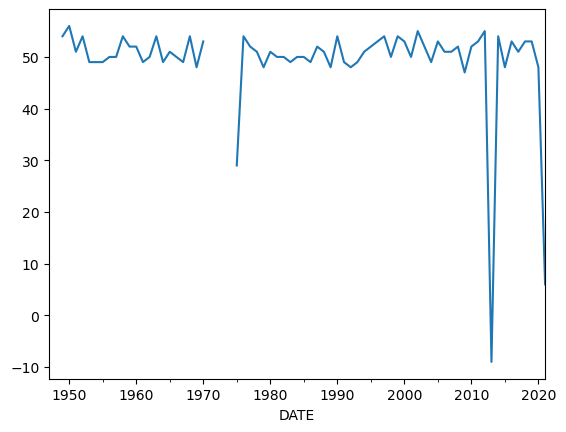

In [66]:
greenland_climate_df.TMIN.resample('YS').max().plot()
#greenland_climate_df.PRCP.plot()

In [67]:
# store the df for later use.

%store greenland_climate_df

Stored 'greenland_climate_df' (DataFrame)


<Axes: ylabel='Frequency'>

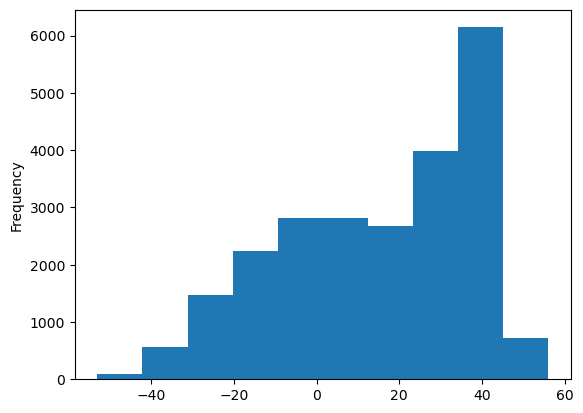

In [68]:
greenland_climate_df.TMIN.plot.hist()

In [69]:
# define a new dataframe, renaming the columns to include correct units.

greenland_climate_df_u = greenland_climate_df.rename(columns={
    'TMIN': 'TMIN_F',
})

greenland_climate_df_u

,PRCP,TMIN_F
DATE,,
1947-11-22,0.00,-7.0
1947-12-05,0.00,-8.0
1949-01-01,0.00,-19.0
1949-01-02,0.06,-2.0
1949-01-03,0.04,-10.0
...,...,...
2020-12-28,NaN,8.0
2020-12-29,NaN,17.0
2020-12-30,NaN,23.0


In [70]:
# define the df as a function that converts Farenheit to Celsius.

greenland_climate_df_u['TMIN_C'] = (greenland_climate_df_u['TMIN_F']-32)*5/9
greenland_climate_df_u

,PRCP,TMIN_F,TMIN_C
DATE,,,
1947-11-22,0.00,-7.0,-21.666667
1947-12-05,0.00,-8.0,-22.222222
1949-01-01,0.00,-19.0,-28.333333
1949-01-02,0.06,-2.0,-18.888889
1949-01-03,0.04,-10.0,-23.333333
...,...,...,...
2020-12-28,NaN,8.0,-13.333333
2020-12-29,NaN,17.0,-8.333333
2020-12-30,NaN,23.0,-5.000000


In [71]:
greenland_climate_df = greenland_climate_df_u[['TMIN_C']]
greenland_climate_df

,TMIN_C
DATE,
1947-11-22,-21.666667
1947-12-05,-22.222222
1949-01-01,-28.333333
1949-01-02,-18.888889
1949-01-03,-23.333333
...,...
2020-12-28,-13.333333
2020-12-29,-8.333333
2020-12-30,-5.000000


<Axes: title={'center': 'Minimum Temperature in Sondrestrom over Time'}, xlabel='Date', ylabel='Minimum Temperature (C)'>

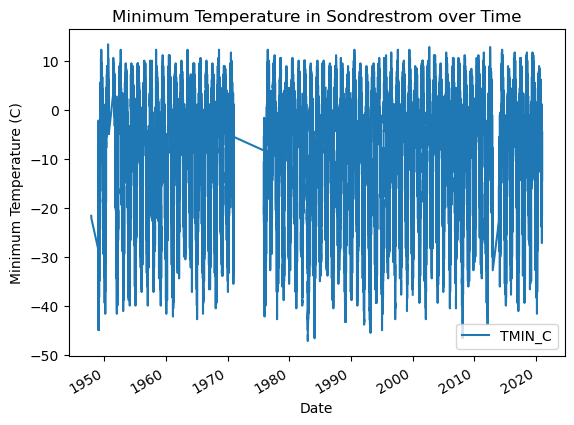

In [73]:
# Plot the data using .plot
# greenland_climate_df.plot(
#     y='PRCP',
#     title='Precipitation in Sondrestrom over Time',
#     xlabel='Date',
#     ylabel='Precipitation (in.)')
# Plot the data using .plot
greenland_climate_df.plot(
    y='TMIN_C',
    title='Minimum Temperature in Sondrestrom over Time',
    xlabel='Date',
    ylabel='Minimum Temperature (C)')

In [80]:
gl_ann_climate_df = greenland_climate_df.resample('YS').mean()
gl_ann_climate_df

,TMIN_C
DATE,
1947-01-01,-21.944444
1948-01-01,NaN
1949-01-01,-11.859970
1950-01-01,-7.413512
1951-01-01,-4.455725
...,...
2017-01-01,-9.058770
2018-01-01,-9.972603
2019-01-01,-8.100704


<Axes: title={'center': 'Average Annual Minimum Temperature in Sondrestrom over Time'}, xlabel='Date', ylabel='Temperature ($^\\circ$C)'>

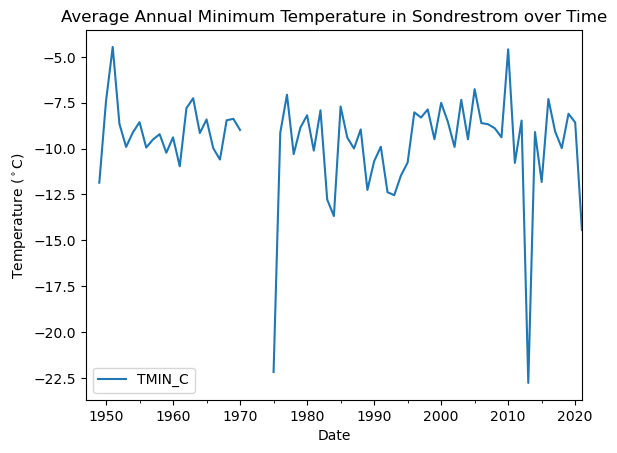

In [81]:
# Plot the annual data
gl_ann_temp_plot = gl_ann_climate_df.plot(
    y='TMIN_C',
    title='Average Annual Minimum Temperature in Sondrestrom over Time',
    xlabel='Date',
    ylabel='Temperature ($^\circ$C)')
gl_ann_temp_plot